## NAMA    : Muhammad Aji Satrio Wiyogo

## BATCH   : RMT-20

## CLASS   : FTDS 


source data     : https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

Tableau link    : https://public.tableau.com/app/profile/muhammad.aji.satrio.wiyogo/viz/Book1_16874367888560/Main?publish=yes

---
## LATAR BELAKANG

Meskipun terjadi peningkatan penjualan pada tahun 2021 dibandingkan dengan tahun sebelumnya, namun masih terdapat perbedaan yang signifikan antara setiap retail penjualan Adidas. Hal ini menunjukkan bahwa strategi penjualan yang diterapkan belum secara konsisten efektif di semua retail. Oleh karena itu, diperlukan analisis mendalam untuk mengidentifikasi faktor-faktor yang mempengaruhi perbedaan tersebut.

Dalam rangka meningkatkan kinerja penjualan, perlu dilakukan analisis tren penjualan untuk memahami pola penjualan yang terjadi. Selain itu, evaluasi kinerja produk berdasarkan jumlah unit terjual dan total penjualan menjadi kunci dalam mengoptimalkan strategi penjualan. Pengaruh lokasi penjualan, baik dari segi region maupun kota, juga perlu dipertimbangkan karena dapat mempengaruhi preferensi konsumen dan permintaan pasar.

Dengan pemahaman yang mendalam mengenai perbedaan penjualan retail Adidas dan faktor-faktor yang mempengaruhinya, dapat dihasilkan insight dan rekomendasi yang dapat meningkatkan strategi penjualan, mengoptimalkan penempatan produk, serta meningkatkan profitabilitas dan pangsa pasar Adidas.

### PROBLEM STATEMENT 

Ditemukan perbedaan yang signifikan dalam penjualan retail Adidas pada tahun 2021. Oleh karena itu, diperlukan identifikasi peluang perbaikan guna meningkatkan penjualan di tahun berikutnya. Untuk mencapai hal tersebut, perlu dilakukan analisis tren penjualan, evaluasi kinerja produk, serta mempertimbangkan pengaruh lokasi dan kategori produk yang dijual.

Dari problem statement diatas maka dapat diberikan point point pertanyaan , antara lain :

1. Apakah ada perbedaan dalam total sales berdasarkan kategori produk di masing masing retail?
2. Apakah ada pengaruh sales method  terhadap total salesnya di masing masing retail? 
3. Apakah ada pengaruh berdasarkan region nya terhadap total sales di masing masingg retail ?
4. Apakah ada pengaruh berdasarkan kota nya terhadap total sales di masing masing retail ?
5. Apakah ada pengaruh berdasarkan hari/bulan terhadap total sales ?
6. Bagaimana dengan central tendency pada tiap retail? apakah ada insight yang dapat diperoleh ?
7. Bagaimana dengan outlier dari data ? apakah ada insight yang dapat diperoleh ?
8. Apakah secara statistik terdapat perbedaan penjualan terhadap masing masing retail ?
8. Apakah terdapat hubungan yang signifikan antara total sales dengan kolom yang tersedia berdasarkan analisis korelasi?


---

In [64]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

In [65]:
df = pd.read_excel('AdidasSalesdata.xlsx')

In [66]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [67]:
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet
9647,West Gear,1128299,2020-03-18,West,Nevada,Las Vegas,Women,Athletic Footwear,26,96,2496.0,848.64,0.34,Outlet


In [68]:
df['Category'] = df['Gender Type'] + ' ' + df['Product Category']

In [69]:
kolom_drop = ['Product Category','Gender Type']
df.drop(kolom_drop, axis =1 , inplace = True)

In [70]:
df2021=df[df['Invoice Date'].dt.year == 2021]

In [106]:
df2021['Invoice Day'] = df2021['Invoice Date'].dt.strftime('%A')
df2021['Invoice Month'] = df2021['Invoice Date'].dt.strftime('%B')

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1047905980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['Invoice Day'] = df2021['Invoice Date'].dt.strftime('%A')
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1047905980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['Invoice Month'] = df2021['Invoice Date'].dt.strftime('%B')


In [72]:
df2021.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,55,125,68750.0,24062.5,0.35,Outlet,Men Apparel,Tuesday,October
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,45,225,101250.0,30375.0,0.30,Outlet,Women Apparel,Wednesday,October
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,45,475,213750.0,117562.5,0.55,Outlet,Men Street Footwear,Thursday,October
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,45,125,56250.0,19687.5,0.35,Outlet,Men Athletic Footwear,Friday,October
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,35,175,61250.0,24500.0,0.40,Outlet,Women Street Footwear,Saturday,October


In [73]:
df2021['Retailer'].unique()

array(['Foot Locker', 'Amazon', 'Sports Direct', 'West Gear', "Kohl's",
       'Walmart'], dtype=object)

In [74]:
df2021['Invoice Date'].min()

Timestamp('2021-01-01 00:00:00')

In [75]:
df2021['Invoice Date'].max()

Timestamp('2021-12-31 00:00:00')

In [76]:
df2021.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Category            0
Invoice Day         0
Invoice Month       0
dtype: int64

In [77]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 0 to 9431
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          8346 non-null   object        
 1   Retailer ID       8346 non-null   int64         
 2   Invoice Date      8346 non-null   datetime64[ns]
 3   Region            8346 non-null   object        
 4   State             8346 non-null   object        
 5   City              8346 non-null   object        
 6   Price per Unit    8346 non-null   int64         
 7   Units Sold        8346 non-null   int64         
 8   Total Sales       8346 non-null   float64       
 9   Operating Profit  8346 non-null   float64       
 10  Operating Margin  8346 non-null   float64       
 11  Sales Method      8346 non-null   object        
 12  Category          8346 non-null   object        
 13  Invoice Day       8346 non-null   object        
 14  Invoice Month     8346 n

In [78]:
df2021['Region'].unique()

array(['Northeast', 'Midwest', 'Southeast', 'West', 'South'], dtype=object)

In [79]:
df2021['Region'].value_counts()

Northeast    2145
West         1881
Midwest      1728
South        1512
Southeast    1080
Name: Region, dtype: int64

In [80]:
df2021['State'].unique()

array(['Pennsylvania', 'Rhode Island', 'Delaware', 'New Hampshire',
       'Connecticut', 'West Virginia', 'Maryland', 'Massachusetts',
       'Maine', 'Vermont', 'New Jersey', 'New York', 'Ohio', 'Michigan',
       'North Dakota', 'South Dakota', 'Missouri', 'Iowa', 'Indiana',
       'Wisconsin', 'Illinois', 'Nebraska', 'Kansas', 'Virginia',
       'Georgia', 'Florida', 'Kentucky', 'North Carolina',
       'South Carolina', 'Utah', 'Alaska', 'Wyoming', 'California',
       'Texas', 'Tennessee', 'Alabama', 'Mississippi', 'Montana',
       'Louisiana', 'Oklahoma', 'Arkansas', 'Idaho', 'Hawaii',
       'New Mexico', 'Arizona', 'Oregon'], dtype=object)

In [81]:
df2021['City'].unique()

array(['Philadelphia', 'Providence', 'Wilmington', 'Manchester',
       'Hartford', 'Charleston', 'Baltimore', 'Boston', 'Portland',
       'Burlington', 'Newark', 'Albany', 'Columbus', 'Detroit', 'Fargo',
       'Sioux Falls', 'St. Louis', 'Des Moines', 'Indianapolis',
       'Milwaukee', 'Chicago', 'Omaha', 'Wichita', 'Richmond', 'Atlanta',
       'Orlando', 'Louisville', 'Charlotte', 'Salt Lake City',
       'Anchorage', 'Cheyenne', 'Los Angeles', 'Dallas', 'Knoxville',
       'Birmingham', 'Jackson', 'Billings', 'New Orleans',
       'Oklahoma City', 'Little Rock', 'San Francisco', 'Boise',
       'Honolulu', 'Albuquerque', 'Phoenix'], dtype=object)

In [82]:
df2021.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,8.346000e+03,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,1.175691e+06,44.372154,241.614186,86007.842080,32202.144605,0.425996
std,2.512834e+04,14.631328,198.512997,131330.187492,50863.758202,0.094454
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,101.000000,3904.500000,1774.927500,0.350000
50%,1.185732e+06,45.000000,173.000000,8620.000000,4019.040000,0.410000
75%,1.185732e+06,54.000000,325.000000,136875.000000,48125.000000,0.500000
max,1.197831e+06,110.000000,1150.000000,825000.000000,371250.000000,0.800000


In [83]:
df2021['Retailer'].unique()

array(['Foot Locker', 'Amazon', 'Sports Direct', 'West Gear', "Kohl's",
       'Walmart'], dtype=object)

In [84]:
df['Category'].unique()

array(['Men Apparel', 'Women Apparel', 'Men Street Footwear',
       'Men Athletic Footwear', 'Women Street Footwear',
       'Women Athletic Footwear'], dtype=object)

In [85]:
df['Sales Method'].unique()

array(['Outlet', 'Online', 'In-store'], dtype=object)

In [86]:
df2021 = df[df['Invoice Date'].dt.year == 2021 ]


In [87]:
retailtop = df2021[['Retailer', 'Total Sales']].groupby('Retailer').sum()
retailtop

,Total Sales
Retailer,
Amazon,77698912.0
Foot Locker,177217915.0
Kohl's,101356250.0
Sports Direct,167209896.0
Walmart,41673410.0
West Gear,152665067.0


<Axes: xlabel='Retailer', ylabel='Total Sales'>

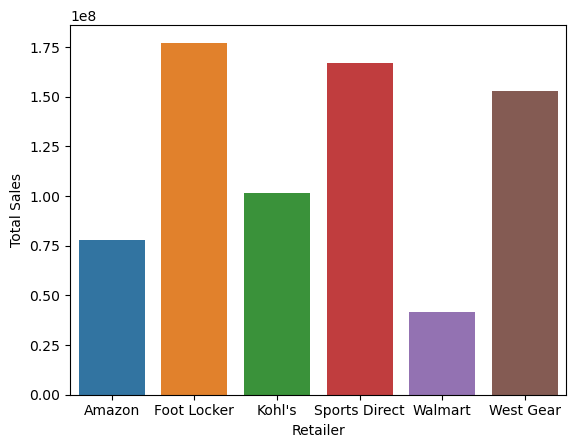

In [88]:
sns.barplot (data=retailtop, x=retailtop.index, y='Total Sales')

Dari grafik yang ditampilkan terlihat bahwa total penjualan di Walmart merupakan yang terendah, sementara total penjualan terbesar terdapat pada retail Foot Locker, diikuti oleh retail Sports Direct.

In [89]:
topcategory=df2021[['Category','Total Sales']].groupby('Category').sum()
topcategory

,Total Sales
Category,
Men Apparel,97511668.0
Men Athletic Footwear,121879218.0
Men Street Footwear,171003224.0
Women Apparel,143848528.0
Women Athletic Footwear,83002004.0
Women Street Footwear,100576808.0


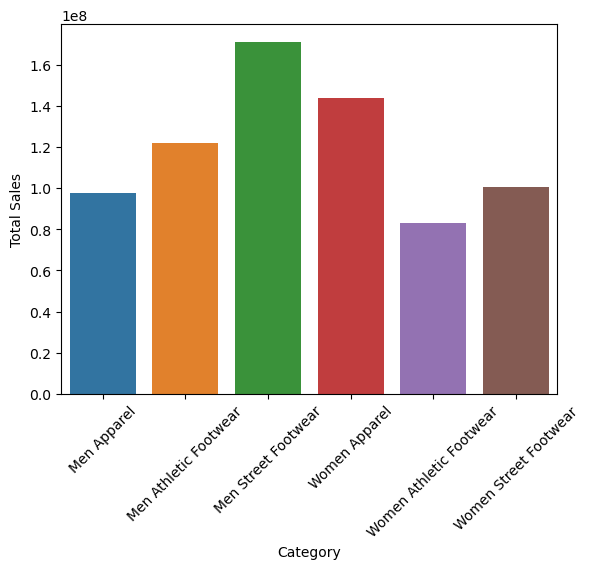

In [90]:
sns.barplot (data=topcategory, x=topcategory.index, y='Total Sales' )
plt.xticks(rotation=45)
plt.show()

Dari grafik total sales berdasarkan category, terlihat category Men Street Footwear memiliki total sales yanng paling tinggi dibandingkan lainnya, diikuti oleh total sales Women Apparel. Selain itu Total Sales paling kecil berada di category Women Athletic Footwear

In [91]:
method = df2021[['Sales Method','Total Sales']].groupby('Sales Method').sum()
method

,Total Sales
Sales Method,
In-store,262740750.0
Online,243152916.0
Outlet,211927784.0


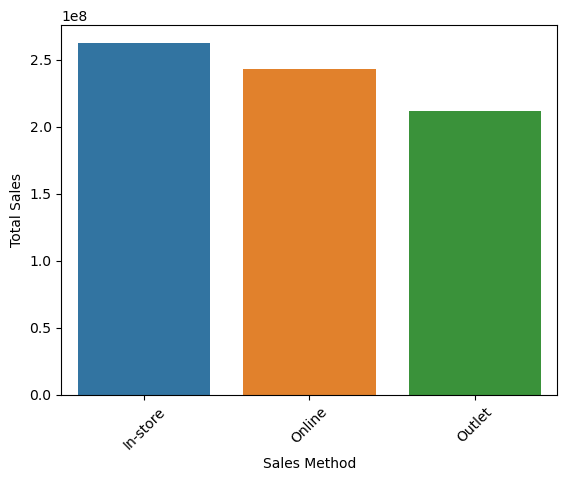

In [92]:
sns.barplot (data=method, x=method.index, y='Total Sales' )
plt.xticks(rotation=45)
plt.show()

Dari sini terlihat metode penjualan instore mendominasi dibandingkan yang lain. 

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\957618207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regiontop= df.groupby('Region').sum()


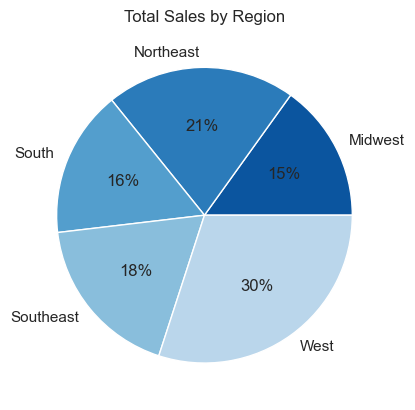

In [93]:
regiontop= df.groupby('Region').sum()
sns.set(style='whitegrid')
colors = sns.color_palette('Blues_r')[0:5]
#create pie chart
plt.pie(data=regiontop, x= 'Total Sales',labels=regiontop.index,colors = colors, autopct='%.0f%%')
plt.title('Total Sales by Region')
plt.show()

Berdasarkan Regionnya, total sales yang berada di region West memiliki total sales yang paling baik dibandingkan yang lainnya, sedangkan yang paling terkecil berada di region Midwest

---

In [94]:
retail_c = df2021[['Retailer', 'Category', 'Total Sales']].groupby(['Retailer','Category']).sum().unstack()
retail_c

Total Sales                                            \
Category      Men Apparel Men Athletic Footwear Men Street Footwear   
Retailer                                                              
Amazon         10474770.0            12011959.0          22161652.0   
Foot Locker    22709819.0            29335297.0          46753704.0   
Kohl's         14164965.0            17666062.0          22251015.0   
Sports Direct  22810383.0            28175199.0          35721530.0   
Walmart         5889272.0             8507698.0           9435235.0   
West Gear      21462459.0            26183003.0          34680088.0   

                                                                           
Category      Women Apparel Women Athletic Footwear Women Street Footwear  
Retailer                                                                   
Amazon           15710639.0               7935255.0             9404637.0  
Foot Locker      35068130.0              19421437.0            23929528.0  
Kohl's           20315239.0              12343307.0            14615662.0  
Sports Direct    34658798.0              20615846.0            25228140.0  
Walmart           7528251.0               4710247.0             5602707.0  
West Gear        30567471.0              17975912.0            21796134.0

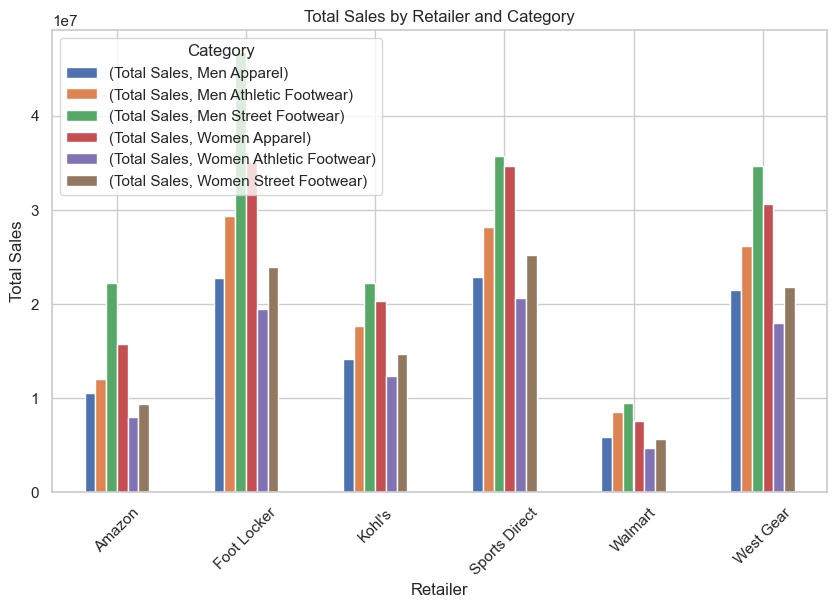

In [95]:
retail_c.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Retailer and Category')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

Dari grafik yang ditampilkan, terlihat adanya tren penjualan berdasarkan kategori produk di berbagai retail. Secara keseluruhan, kategori "Men Athletic Footwear" menunjukkan total penjualan tertinggi dibandingkan dengan kategori lainnya, diikuti oleh kategori "Women Apparel". Selain itu, terlihat pula bahwa kategori "Women Athletic Footwear" memiliki total penjualan yang paling rendah berdasarkan nilai yang terlihat pada grafik.

In [96]:
retail_m = df2021[['Retailer', 'Sales Method', 'Total Sales']].groupby(['Retailer','Sales Method']).sum().unstack()
retail_m

Total Sales                        
Sales Method     In-store      Online      Outlet
Retailer                                         
Amazon         22366250.0  28909731.0  26422931.0
Foot Locker    60384250.0  71890450.0  44943215.0
Kohl's         29566250.0  30973726.0  40816274.0
Sports Direct  45922250.0  58845994.0  62441652.0
Walmart        16411250.0  14251637.0  11010523.0
West Gear      88090500.0  38281378.0  26293189.0

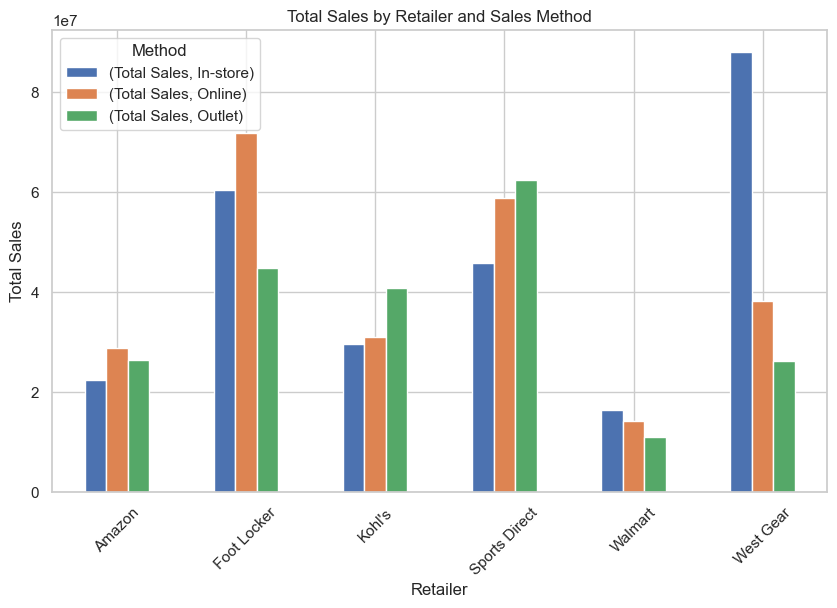

In [97]:
retail_m.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Retailer and Sales Method')
plt.legend(title='Method')
plt.xticks(rotation=45)
plt.show()

Dari grafik, terlihat bahwa untuk retail Amazon, total sales yang paling tinggi terjadi melalui penjualan  online, sedangkan yang paling rendah terjadi melalui penjualan  in-store. Pada retail Foot Locker, total sales tertinggi terjadi melalui penjualan online, sedangkan yang paling rendah terjadi melalui penjualan di outlet. Pada retail Kohl's, total sales tertinggi terjadi di outlet, sedangkan yang paling rendah terjadi di toko fisik (in-store). Pada retail Sports Direct, polanya mirip dengan Kohl's, di mana total sales tertinggi terjadi di outlet, sedangkan yang paling rendah terjadi di toko fisik (in-store). Sedangkan pada retail Walmart dan West Gear, total sales tertinggi diperoleh melalui penjualan di toko fisik (in-store), sedangkan yang paling rendah terjadi melalui penjualan di outlet.

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1673545249.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regionsales = walmart.groupby('Region').sum()
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1673545249.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regionsales = walmart.groupby('Region').sum()
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1673545249.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

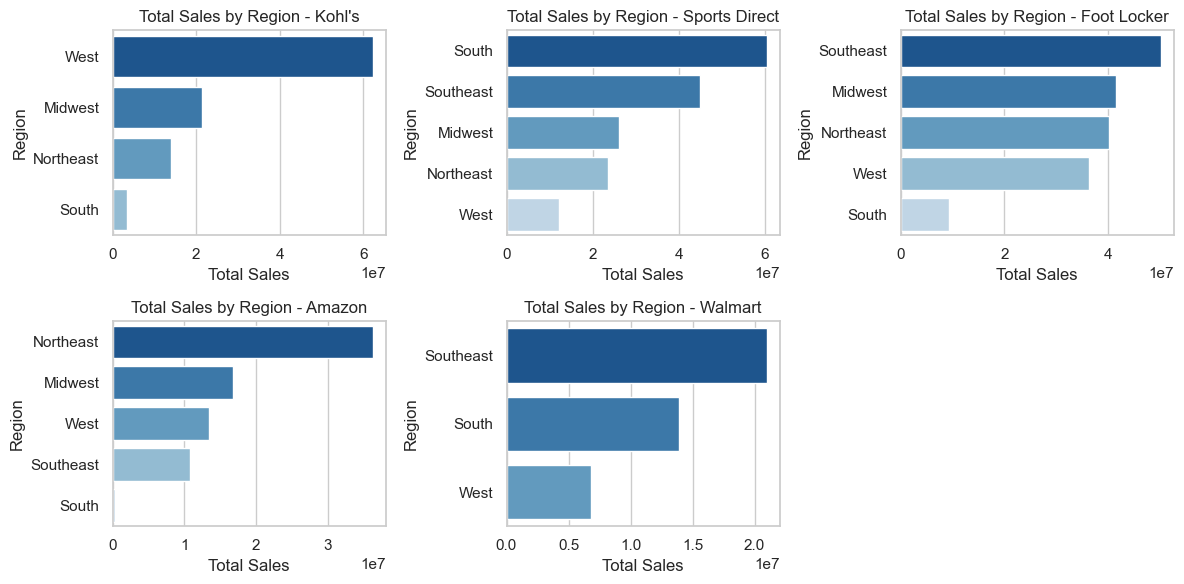

In [98]:
retailers = ["Kohl's", 'Sports Direct', 'Foot Locker', 'Amazon', 'Walmart']
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i, retailer in enumerate(retailers):
    walmart = df2021[df2021['Retailer'] == retailer]
    regionsales = walmart.groupby('Region').sum()
    regionsales = regionsales.sort_values(by='Total Sales', ascending=False)
    sns.set(style='darkgrid')
    colors = sns.color_palette('Blues_r')[0:5]
    sns.barplot(data=regionsales, x='Total Sales', y=regionsales.index, palette=colors, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Total Sales by Region - {retailer}')
    axes[i // 3, i % 3].set_xlabel('Total Sales')
    axes[i // 3, i % 3].set_ylabel('Region')
for j in range(len(retailers), 6):
    fig.delaxes(axes[j // 3, j % 3])
plt.tight_layout()
plt.show()

Retail Walmart: Tidak terdapat total penjualan dari region Midwest dan Northeast. Penjualan tertinggi terjadi di region Southeast, sementara penjualan terendah terjadi di region West.
Retail Amazon: Total penjualan terbesar berasal dari region Northeast, sedangkan total penjualan terkecil terjadi di region South.
Retail Kohl's: Total penjualan tertinggi terjadi di region West, sedangkan total penjualan terendah terjadi di region South. Tidak ada penjualan yang dilaporkan dari region Southeast.
Retail Sports Direct: Region dengan total penjualan tertinggi adalah region South, sementara total penjualan terendah terjadi di region West.
Retail Foot Locker: Total penjualan tertinggi berasal dari region Southwest, sementara total penjualan terendah terjadi di region South.

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\599253230.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  citysales = walmart.groupby('City').sum()
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\599253230.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  citysales = walmart.groupby('City').sum()
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\599253230.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


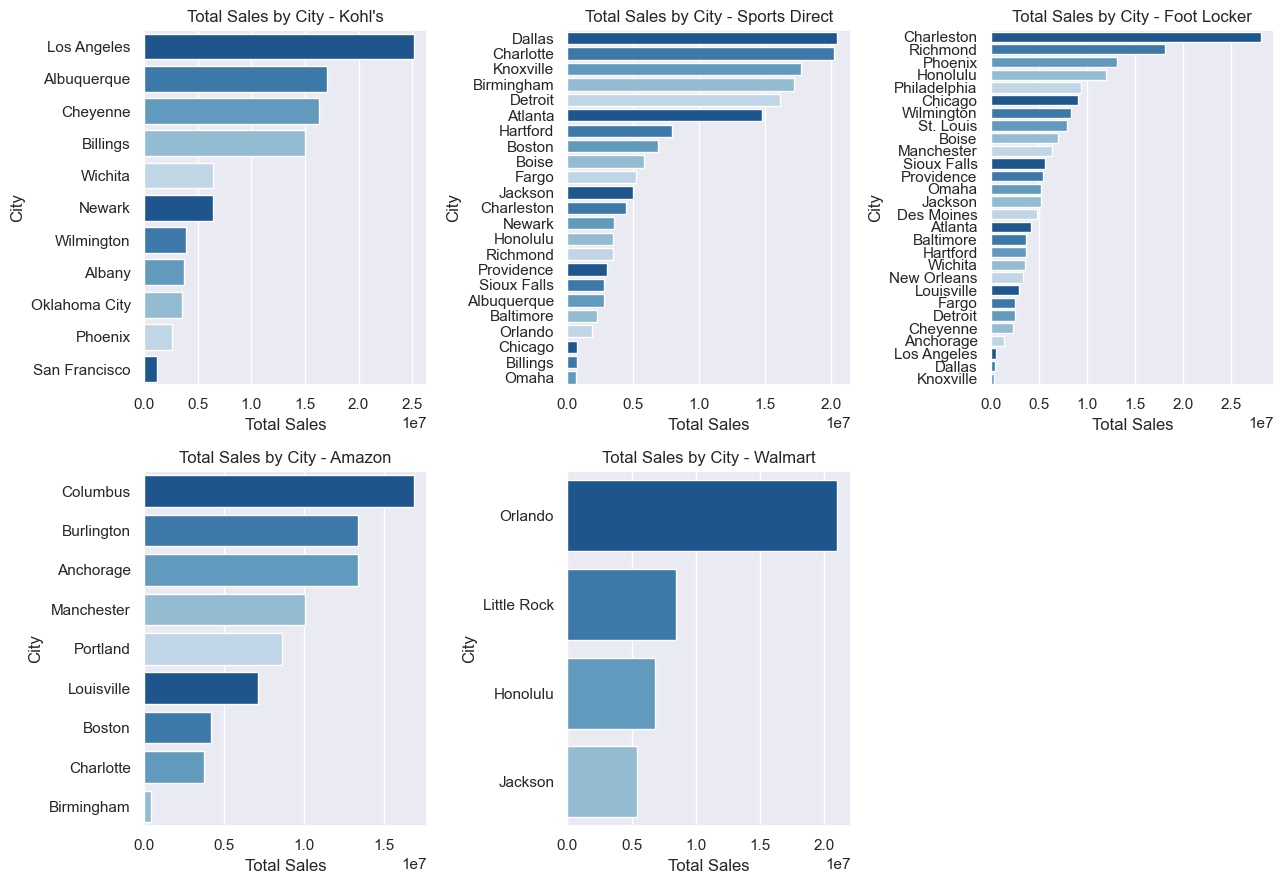

In [99]:
retailers = ["Kohl's", 'Sports Direct', 'Foot Locker', 'Amazon', 'Walmart']
fig, axes = plt.subplots(2, 3, figsize=(13, 9))
for i, retailer in enumerate(retailers):
    walmart = df2021[df2021['Retailer'] == retailer]
    citysales = walmart.groupby('City').sum()
    citysales = citysales.sort_values(by='Total Sales', ascending=False)
    sns.set(style='darkgrid')
    colors = sns.color_palette('Blues_r')[0:5]
    sns.barplot(data=citysales, x='Total Sales', y=citysales.index, palette=colors, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Total Sales by City - {retailer}')
    axes[i // 3, i % 3].set_xlabel('Total Sales')
    axes[i // 3, i % 3].set_ylabel('City')
for j in range(len(retailers), 6):
    fig.delaxes(axes[j // 3, j % 3])
plt.tight_layout()
plt.show()


Dari analisis data retail di tiap kota, terlihat bahwa retail Walmart mencatat total penjualan tertinggi di kota Orlando. Sementara itu, retail Amazon mencapai total penjualan tertinggi di kota Columbus. Untuk retail Kohl's, kota Los Angeles menjadi kota dengan total penjualan terbesar. Selain itu, retail Sports Direct mencatat total penjualan tertinggi di kota Dallas dan Charlotte. Dalam hal retail Foot Locker, terlihat bahwa total penjualan tertinggi terjadi di kota Charleston. Dengan memperhatikan grafik yang disediakan, pola ini menjadi lebih jelas dan dapat diamati dengan baik.

In [ ]:
df2021

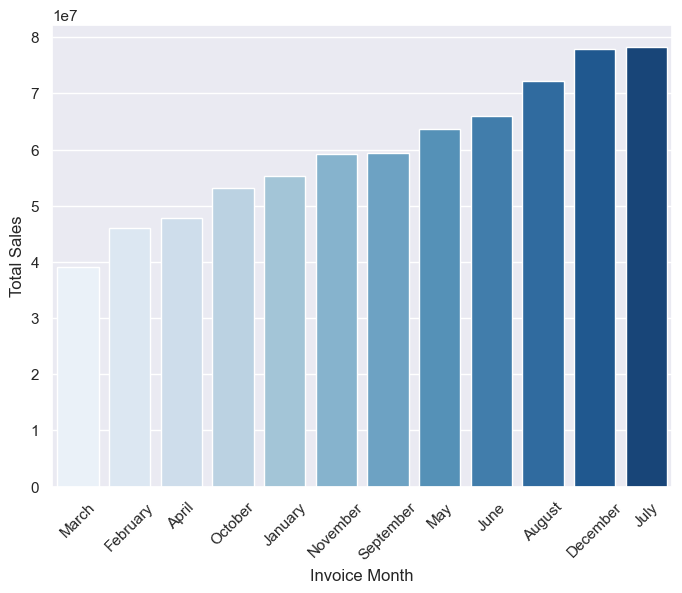

In [108]:
df2021_day = df2021.groupby('Invoice Month')['Total Sales'].sum().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=df2021_day.index, y=df2021_day.values, palette='Blues')
plt.xlabel('Invoice Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Dari graphic total sales berdasarkan bulannya diatas menunjukkan beberapa hal yaitu, pada bulan july dan desember memiliki total sales yang paling tinggi. Sedangkan untuk bulan maret dan februari memiliki total sales yang paling rendah.

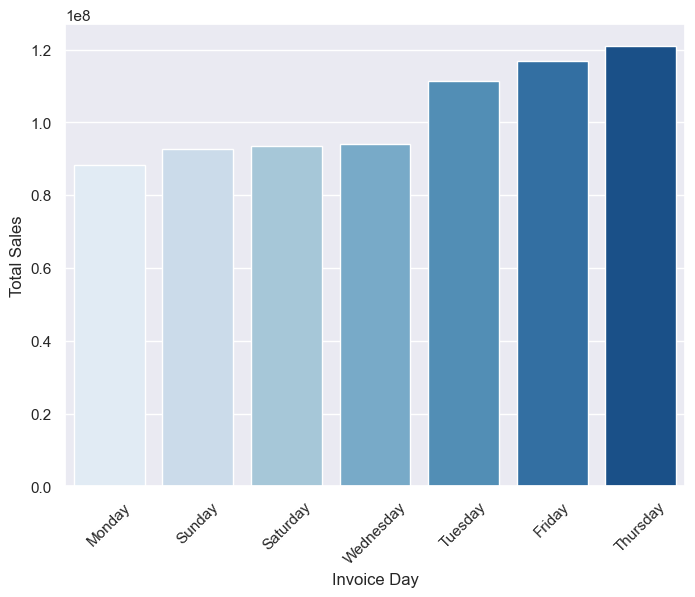

In [110]:
df2021_day = df2021.groupby('Invoice Day')['Total Sales'].sum().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=df2021_day.index, y=df2021_day.values, palette='Blues')
plt.xlabel('Invoice Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Dari graphic total sales berdasarkan harinya diatas menunjukkan beberapa hal yaitu, total sales yang paling tinggi berada di hari kamis jumat, sedangkan hari senin dan minggu memiliki total sales yang paling rendah.

--- 

<Axes: xlabel='Total Sales', ylabel='Count'>

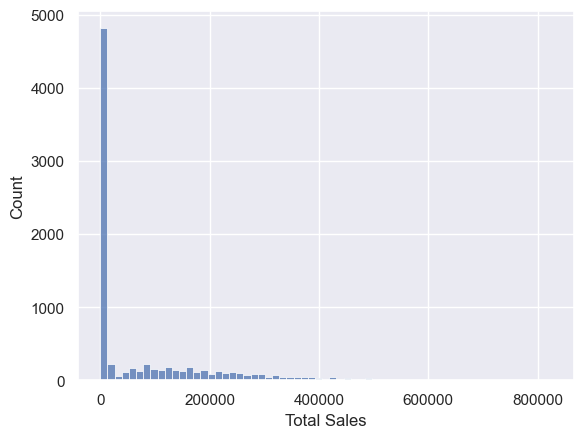

In [111]:
sns.histplot(data=df2021, x='Total Sales')

Dari plot histogram yang diberikan distribusi nilai total sales terlihat tidak normal atau cenderung memiliki skewness kekanan

In [112]:
retail_ind = df2021.groupby('Retailer')['Total Sales','Units Sold']

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\1160664302.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retail_ind = df2021.groupby('Retailer')['Total Sales','Units Sold']


In [113]:
retail_ind.mean().round(2)

,Total Sales,Units Sold
Retailer,,
Amazon,81874.51,208.63
Foot Locker,77051.27,210.46
Kohl's,99174.41,279.02
Sports Direct,86817.18,265.51
Walmart,101642.46,259.58
West Gear,87789.00,248.13


In [114]:
retail_ind.median().round(2)

,Total Sales,Units Sold
Retailer,,
Amazon,7876.0,149.0
Foot Locker,7778.5,146.5
Kohl's,9487.0,197.0
Sports Direct,8027.0,181.0
Walmart,9408.0,180.0
West Gear,10320.0,175.0


In [116]:
retail_ind.std().round(2)

,Total Sales,Units Sold
Retailer,,
Amazon,113390.21,169.65
Foot Locker,121211.35,188.73
Kohl's,131163.72,204.95
Sports Direct,129081.12,211.85
Walmart,166378.15,189.82
West Gear,144955.71,200.20


Retailer Amazon memiliki nilai standar deviasi yang relatif rendah dibandingkan dengan retailer lainnya. Hal ini menunjukkan bahwa penjualan mereka cenderung stabil dan tidak bervariasi secara signifikan dari periode ke periode.
Retailer Walmart memiliki standar deviasi yang tinggi, menunjukkan adanya variasi yang besar dalam penjualan mereka dari periode ke periode. Ini dapat mengindikasikan fluktuasi yang signifikan dalam kinerja penjualan mereka.
Retailer Kohl's memiliki nilai median penjualan tertinggi, yang berarti setengah dari data penjualan mereka berada di atas nilai ini. Hal ini menunjukkan bahwa mereka memiliki kinerja penjualan yang baik dan stabil secara keseluruhan.

Retailer Amazon memiliki nilai standar deviasi yang relatif rendah dibandingkan dengan retailer lainnya. Hal ini menunjukkan bahwa penjualan mereka cenderung stabil dan tidak bervariasi secara signifikan dari periode ke periode.
Retailer Walmart memiliki standar deviasi yang tinggi, menunjukkan adanya variasi yang besar dalam penjualan mereka dari periode ke periode. Ini dapat mengindikasikan fluktuasi yang signifikan dalam kinerja penjualan mereka.
Retailer Kohl's memiliki nilai median penjualan tertinggi, yang berarti setengah dari data penjualan mereka berada di atas nilai ini. Hal ini menunjukkan bahwa mereka memiliki kinerja penjualan yang baik dan stabil secara keseluruhan.

---

In [117]:
df2021

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,55,125,68750.0,24062.50,0.35,Outlet,Men Apparel,Tuesday,October
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,45,225,101250.0,30375.00,0.30,Outlet,Women Apparel,Wednesday,October
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,45,475,213750.0,117562.50,0.55,Outlet,Men Street Footwear,Thursday,October
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,45,125,56250.0,19687.50,0.35,Outlet,Men Athletic Footwear,Friday,October
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,35,175,61250.0,24500.00,0.40,Outlet,Women Street Footwear,Saturday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,West Gear,1128299,2021-01-17,West,Oregon,Portland,33,68,2244.0,1144.44,0.51,Outlet,Men Apparel,Sunday,January
9428,West Gear,1128299,2021-01-17,West,Oregon,Portland,34,140,4760.0,1904.00,0.40,Outlet,Women Apparel,Sunday,January
9429,West Gear,1128299,2021-02-17,West,Oregon,Portland,24,175,4200.0,1890.00,0.45,Outlet,Men Street Footwear,Wednesday,February
9430,West Gear,1128299,2021-02-17,West,Oregon,Portland,31,124,3844.0,1652.92,0.43,Outlet,Men Athletic Footwear,Wednesday,February


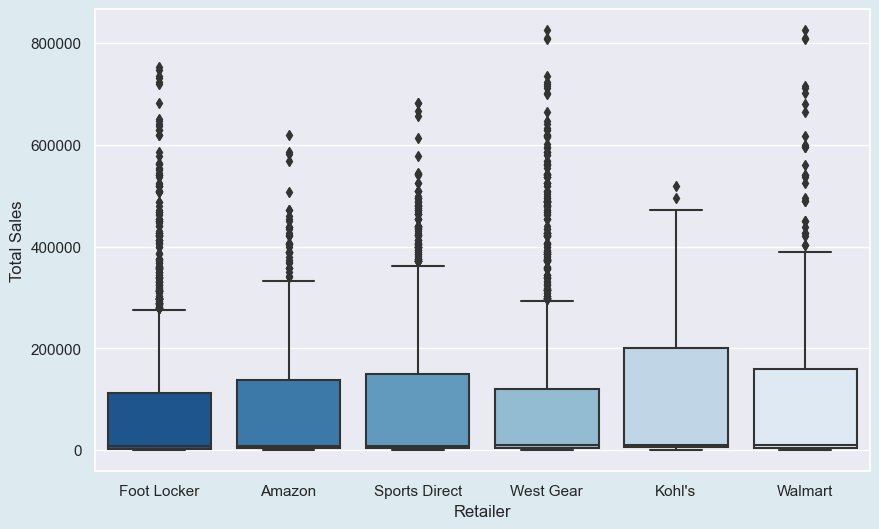

In [122]:
plt.figure(figsize=(10, 6), facecolor='#ddebf0')
sns.boxplot(data=df2021, x='Retailer', y='Total Sales', palette= 'Blues_r')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.show()

Dari boxplot retail terhadap total sales yang ditampilkan dapat terlihat pada masing masing retail memiliki outlier yang cukup tinggi. Maka dari itu perlu dilakukan analisis lebih lanjut agar didapatkan insight terhadap masing masing retailnya.

In [123]:
Q1 = df2021['Total Sales'].quantile(0.25)
Q3 = df2021['Total Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outlier_iqr_1 =df2021[(df2021['Total Sales']>upper_limit) | (df2021['Total Sales']<lower_limit)] 
outlier_iqr_1

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
38,Foot Locker,1185732,2021-12-03,Northeast,Pennsylvania,Philadelphia,65,525,341250.0,187687.5,0.55,Outlet,Men Street Footwear,Friday,December
513,Foot Locker,1185732,2021-06-15,Northeast,Delaware,Wilmington,55,650,357500.0,125125.0,0.35,In-store,Men Street Footwear,Tuesday,June
519,Foot Locker,1185732,2021-07-13,Northeast,Delaware,Wilmington,55,675,371250.0,129937.5,0.35,In-store,Men Street Footwear,Tuesday,July
525,Foot Locker,1185732,2021-08-14,Northeast,Delaware,Wilmington,55,650,357500.0,125125.0,0.35,In-store,Men Street Footwear,Saturday,August
598,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,75,450,337500.0,135000.0,0.40,Outlet,Men Street Footwear,Thursday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,West Gear,1128299,2021-12-23,West,Oregon,Portland,75,750,562500.0,196875.0,0.35,In-store,Men Athletic Footwear,Thursday,December
9275,West Gear,1128299,2021-12-23,West,Oregon,Portland,70,550,385000.0,134750.0,0.35,In-store,Women Street Footwear,Thursday,December
9276,West Gear,1128299,2021-12-23,West,Oregon,Portland,70,550,385000.0,134750.0,0.35,In-store,Women Athletic Footwear,Thursday,December
9277,West Gear,1128299,2021-12-23,West,Oregon,Portland,80,475,380000.0,152000.0,0.40,In-store,Men Apparel,Thursday,December


In [124]:
outlier_iqr_1['Invoice Day'] = outlier_iqr_1['Invoice Date'].dt.strftime('%A')
outlier_iqr_1['Invoice Month'] = outlier_iqr_1['Invoice Date'].dt.strftime('%B')
outliers = outlier_iqr_1

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\435881170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_iqr_1['Invoice Day'] = outlier_iqr_1['Invoice Date'].dt.strftime('%A')
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\435881170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_iqr_1['Invoice Month'] = outlier_iqr_1['Invoice Date'].dt.strftime('%B')


In [125]:
outliers

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
38,Foot Locker,1185732,2021-12-03,Northeast,Pennsylvania,Philadelphia,65,525,341250.0,187687.5,0.55,Outlet,Men Street Footwear,Friday,December
513,Foot Locker,1185732,2021-06-15,Northeast,Delaware,Wilmington,55,650,357500.0,125125.0,0.35,In-store,Men Street Footwear,Tuesday,June
519,Foot Locker,1185732,2021-07-13,Northeast,Delaware,Wilmington,55,675,371250.0,129937.5,0.35,In-store,Men Street Footwear,Tuesday,July
525,Foot Locker,1185732,2021-08-14,Northeast,Delaware,Wilmington,55,650,357500.0,125125.0,0.35,In-store,Men Street Footwear,Saturday,August
598,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,75,450,337500.0,135000.0,0.40,Outlet,Men Street Footwear,Thursday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,West Gear,1128299,2021-12-23,West,Oregon,Portland,75,750,562500.0,196875.0,0.35,In-store,Men Athletic Footwear,Thursday,December
9275,West Gear,1128299,2021-12-23,West,Oregon,Portland,70,550,385000.0,134750.0,0.35,In-store,Women Street Footwear,Thursday,December
9276,West Gear,1128299,2021-12-23,West,Oregon,Portland,70,550,385000.0,134750.0,0.35,In-store,Women Athletic Footwear,Thursday,December
9277,West Gear,1128299,2021-12-23,West,Oregon,Portland,80,475,380000.0,152000.0,0.40,In-store,Men Apparel,Thursday,December


In [126]:
outliers_total=outliers.groupby('Retailer')['Total Sales','Operating Profit'].sum()
outliers_total

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\652073132.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  outliers_total=outliers.groupby('Retailer')['Total Sales','Operating Profit'].sum()


,Total Sales,Operating Profit
Retailer,,
Amazon,16179500.0,6478937.5
Foot Locker,51388250.0,18963650.0
Kohl's,30365000.0,10766937.5
Sports Direct,57450250.0,25630725.0
Walmart,20663750.0,6400375.0
West Gear,68864500.0,24452175.0


In [127]:
total_2021= df2021.groupby('Retailer')['Total Sales','Operating Profit'].sum()
total_2021

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\2164968673.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_2021= df2021.groupby('Retailer')['Total Sales','Operating Profit'].sum()


,Total Sales,Operating Profit
Retailer,,
Amazon,77698912.0,28818503.31
Foot Locker,177217915.0,65053341.69
Kohl's,101356250.0,36507986.41
Sports Direct,167209896.0,68543020.92
Walmart,41673410.0,13625513.09
West Gear,152665067.0,56210733.45


In [128]:
difference = (outliers_total/total_2021)*100
difference= difference.reset_index()
difference

,Retailer,Total Sales,Operating Profit
0,Amazon,20.823329,22.481867
1,Foot Locker,28.997209,29.150924
2,Kohl's,29.958685,29.492006
3,Sports Direct,34.358164,37.393632
4,Walmart,49.584975,46.973460
5,West Gear,45.108224,43.500900


Dari hasil analisis outlier yang telah dilakukan, terlihat bahwa terdapat outlier yang memiliki total sales dan operating profit yang cukup tinggi, dengan persentase antara 20% hingga 49%. Salah satu outlier tersebut adalah Walmart, yang memiliki total sales sebesar 49% di atas nilai normal. Artinya disini adapun strategi yang dilakukan oleh retail walmart dapat memberikan potensi untuk meningkatkan penjualan , atau menjadi sumber inspirasi untuk strategi penjualan yang lebih effisien ataupun efektif.

---

In [129]:
df2021

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,55,125,68750.0,24062.50,0.35,Outlet,Men Apparel,Tuesday,October
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,45,225,101250.0,30375.00,0.30,Outlet,Women Apparel,Wednesday,October
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,45,475,213750.0,117562.50,0.55,Outlet,Men Street Footwear,Thursday,October
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,45,125,56250.0,19687.50,0.35,Outlet,Men Athletic Footwear,Friday,October
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,35,175,61250.0,24500.00,0.40,Outlet,Women Street Footwear,Saturday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,West Gear,1128299,2021-01-17,West,Oregon,Portland,33,68,2244.0,1144.44,0.51,Outlet,Men Apparel,Sunday,January
9428,West Gear,1128299,2021-01-17,West,Oregon,Portland,34,140,4760.0,1904.00,0.40,Outlet,Women Apparel,Sunday,January
9429,West Gear,1128299,2021-02-17,West,Oregon,Portland,24,175,4200.0,1890.00,0.45,Outlet,Men Street Footwear,Wednesday,February
9430,West Gear,1128299,2021-02-17,West,Oregon,Portland,31,124,3844.0,1652.92,0.43,Outlet,Men Athletic Footwear,Wednesday,February


In [130]:
df2021['Retailer'].unique()

array(['Foot Locker', 'Amazon', 'Sports Direct', 'West Gear', "Kohl's",
       'Walmart'], dtype=object)

In [131]:
flocker = df2021[df2021.Retailer == 'Foot Locker'].groupby('Invoice Date').sum()['Total Sales']
amazon = df2021[df2021.Retailer == 'Amazon'].groupby('Invoice Date').sum()['Total Sales']
sdirect = df2021[df2021.Retailer == 'Sports Direct'].groupby('Invoice Date').sum()['Total Sales']
wgear = df2021[df2021.Retailer == 'West Gear'].groupby('Invoice Date').sum()['Total Sales']
flocker = df2021[df2021.Retailer == "Kohl's"].groupby('Invoice Date').sum()['Total Sales']
walmart = df2021[df2021.Retailer == "Walmart"].groupby('Invoice Date').sum()['Total Sales']

C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\83720938.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flocker = df2021[df2021.Retailer == 'Foot Locker'].groupby('Invoice Date').sum()['Total Sales']
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\83720938.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amazon = df2021[df2021.Retailer == 'Amazon'].groupby('Invoice Date').sum()['Total Sales']
C:\Users\IMBA PC\AppData\Local\Temp\ipykernel_12100\83720938.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to

In [132]:
print("Daily Average sales of Foot Locker",flocker.mean().round(2))
print("Daily Average sales of Amazon",amazon.mean().round(2))
print("Daily Average sales of Sports Direct",sdirect.mean().round(2))
print("Daily Average sales of West Gear",wgear.mean().round(2))
print("Daily Average sales of Kohl",flocker.mean().round(2))
print("Daily Average sales of Walmart",walmart.mean().round(2))

Daily Average sales of Foot Locker 596213.24
Daily Average sales of Amazon 754358.37
Daily Average sales of Sports Direct 827771.76
Daily Average sales of West Gear 1147857.65
Daily Average sales of Kohl 596213.24
Daily Average sales of Walmart 1666936.4


In [133]:
f_stat,p_value = stats.f_oneway(flocker, amazon, sdirect, wgear, flocker, walmart)
print('P-value:',p_value)

P-value: 3.721668146749425e-18


Dari hasil analisis menggunakan ANOVA, dengan mempertimbangkan nilai P-value yang berada di bawah 0.05, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan secara statistik dalam penjualan harian di setiap retail. Selanjutnya, saat menghitung rata-rata penjualan harian, terlihat bahwa retail Walmart menunjukkan angka tertinggi. Jika dibandingkan dengan total penjualan yang telah dihitung sebelumnya, dapat disimpulkan bahwa retail Walmart memiliki potensi untuk mencapai tingkat penjualan yang lebih tinggi dari yang seharusnya.

--- 

In [134]:
df2021_2 = df2021.copy()

In [135]:
df2021_2

,Retailer,Retailer ID,Invoice Date,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Category,Invoice Day,Invoice Month
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,55,125,68750.0,24062.50,0.35,Outlet,Men Apparel,Tuesday,October
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,45,225,101250.0,30375.00,0.30,Outlet,Women Apparel,Wednesday,October
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,45,475,213750.0,117562.50,0.55,Outlet,Men Street Footwear,Thursday,October
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,45,125,56250.0,19687.50,0.35,Outlet,Men Athletic Footwear,Friday,October
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,35,175,61250.0,24500.00,0.40,Outlet,Women Street Footwear,Saturday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,West Gear,1128299,2021-01-17,West,Oregon,Portland,33,68,2244.0,1144.44,0.51,Outlet,Men Apparel,Sunday,January
9428,West Gear,1128299,2021-01-17,West,Oregon,Portland,34,140,4760.0,1904.00,0.40,Outlet,Women Apparel,Sunday,January
9429,West Gear,1128299,2021-02-17,West,Oregon,Portland,24,175,4200.0,1890.00,0.45,Outlet,Men Street Footwear,Wednesday,February
9430,West Gear,1128299,2021-02-17,West,Oregon,Portland,31,124,3844.0,1652.92,0.43,Outlet,Men Athletic Footwear,Wednesday,February


In [136]:
df2021_2=df2021_2.drop('Invoice Date', axis =1)
df2021_2=df2021_2.drop('Retailer ID', axis =1)
df2021_2=df2021_2.drop('Operating Margin', axis=1)

In [137]:
df2021_2['Retailer']=pd.factorize(df2021_2.Retailer)[0]
df2021_2['Region']=pd.factorize(df2021_2.Region)[0]
df2021_2['State']=pd.factorize(df2021_2.State)[0]
df2021_2['City']=pd.factorize(df2021_2.City)[0]
df2021_2['Sales Method'] = pd.factorize(df2021_2['Sales Method'])[0]
df2021_2['Category']=pd.factorize(df2021_2.Category)[0]
df2021_2['Invoice Day']=pd.factorize(df2021_2['Invoice Day'])[0]
df2021_2['Invoice Month']=pd.factorize(df2021_2['Invoice Month'])[0]

In [138]:
df2021_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 0 to 9431
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          8346 non-null   int64  
 1   Region            8346 non-null   int64  
 2   State             8346 non-null   int64  
 3   City              8346 non-null   int64  
 4   Price per Unit    8346 non-null   int64  
 5   Units Sold        8346 non-null   int64  
 6   Total Sales       8346 non-null   float64
 7   Operating Profit  8346 non-null   float64
 8   Sales Method      8346 non-null   int64  
 9   Category          8346 non-null   int64  
 10  Invoice Day       8346 non-null   int64  
 11  Invoice Month     8346 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 847.6 KB


In [139]:
df2021_2['Total Sales'] = df2021_2['Total Sales'].astype(int)
df2021_2['Operating Profit'] = df2021_2['Operating Profit'].astype(int)

In [140]:
df2021_2

,Retailer,Region,State,City,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Category,Invoice Day,Invoice Month
0,0,0,0,0,55,125,68750,24062,0,0,0,0
1,0,0,0,0,45,225,101250,30375,0,1,1,0
2,0,0,0,0,45,475,213750,117562,0,2,2,0
3,0,0,0,0,45,125,56250,19687,0,3,3,0
4,0,0,0,0,35,175,61250,24500,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9427,3,3,45,8,33,68,2244,1144,0,0,5,11
9428,3,3,45,8,34,140,4760,1904,0,1,5,11
9429,3,3,45,8,24,175,4200,1890,0,2,1,3
9430,3,3,45,8,31,124,3844,1652,0,3,1,3


In [142]:
correlation=df2021_2.corr()

In [143]:
print(correlation)

                  Retailer    Region     State      City  Price per Unit  \
Retailer          1.000000  0.316410  0.363827  0.346532       -0.019445   
Region            0.316410  1.000000  0.905968  0.845293       -0.086591   
State             0.363827  0.905968  1.000000  0.880881       -0.022515   
City              0.346532  0.845293  0.880881  1.000000       -0.060518   
Price per Unit   -0.019445 -0.086591 -0.022515 -0.060518        1.000000   
Units Sold        0.111964  0.186022  0.185064  0.157417        0.266206   
Total Sales       0.056137  0.066696  0.085765  0.060533        0.440313   
Operating Profit  0.043682  0.073338  0.080140  0.053100        0.403847   
Sales Method      0.006280 -0.289283 -0.253870 -0.277082        0.125636   
Category         -0.004101  0.001397  0.001497  0.002127       -0.276039   
Invoice Day      -0.004733 -0.017076 -0.030609 -0.013079       -0.051842   
Invoice Month     0.052591  0.080399  0.093958  0.102030       -0.081117   

           

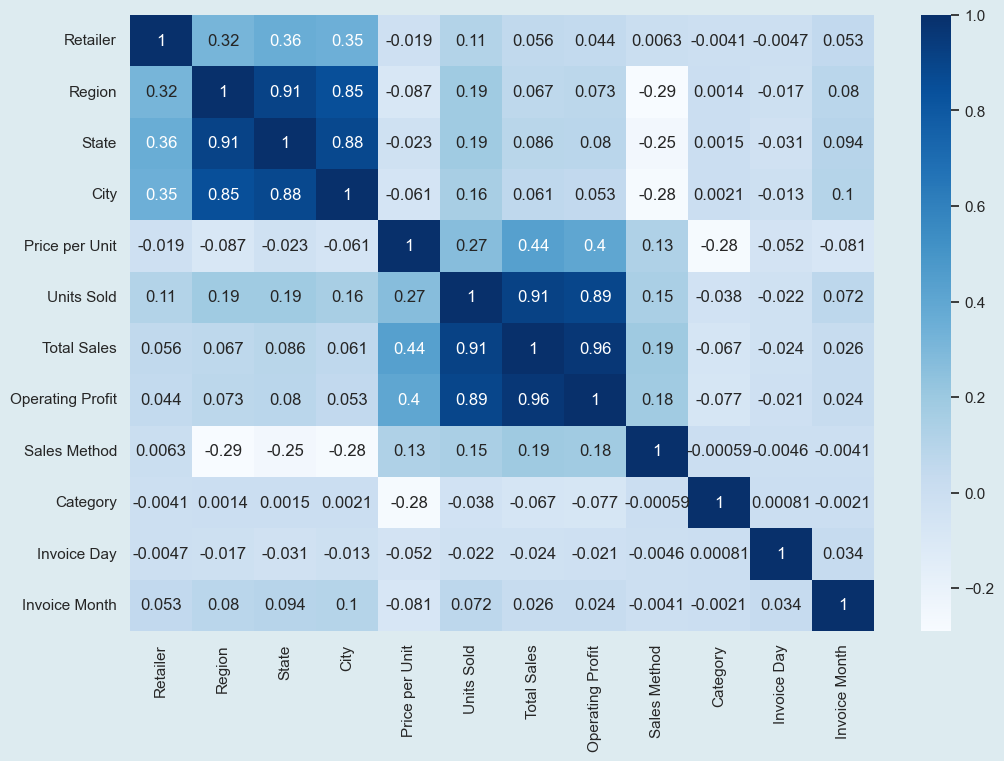

In [144]:
plt.figure(figsize=(12, 8), facecolor='#ddebf0')
sns.heatmap(df2021_2.corr(), annot=True, cmap='Blues')
plt.show()

Dari hasil yang telah dilakukan dengan menggunakan metoda korelasi dapat terlihat , Total sales (total penjualan) sangatlah berkaitan dekat dengan unit yang terjual, operating profit. disamping itu dapat terlihat juga ada pengaruh dari price per unit serta sales method. Retailer, region, state, dan city , bulan penjualan terlihat kurang berpengaruh terhadap total penjualannya. Dan disini category dan penjualan harian tidak berpengaruh terhadap total penjualannya.

### POINT-POINT ANALISIS

--- 

1. Kategori produk "Men Street Footwear" menunjukkan total sales tertinggi di semua retail yang disediakan, selain itu kategori "Women Apparel" juga memiliki total sales yang signifikan di beberapa retail. Kategori "Women Athletic Footwear" cenderung memiliki total sales yang lebih rendah dibandingkan dengan kategori lainnya.

2. Setiap retail memiliki preferensi sales method yang berbeda.Retail Amazon dan Foot Locker menunjukkan total sales tertinggi melalui penjualan online selain itu, retail Kohl's dan Sports Direct memiliki total sales tertinggi melalui penjualan di outlet. Dan yang terakhir retail Walmart dan West Gear memiliki total sales tertinggi melalui penjualan in-store.

3. Setiap retail memiliki perbedaan dalam total sales berdasarkan region. Retail Walmart mencatat total penjualan tertinggi di region Southeast. Retail Amazon memiliki total penjualan terbesar di region Northeast. Namun, tidak semua retail memiliki data penjualan yang lengkap untuk semua region.

4. Terdapat pengaruh berdasarkan kota terhadap total sales. Setiap retail memiliki kota dengan total penjualan terbesar. Sebagai contoh, Walmart mencatat total penjualan tertinggi di kota Orlando, Amazon mencapai total penjualan tertinggi di kota Columbus, dan sebagainya. Disisi lain tidak semua retail memiliki data penjualan yang lengkap untuk semua kota.

5. Berdasarkan analisis pada data harian dan bulanan, terlihat bahwa ada variasi total sales berdasarkan hari dan bulan. Total sales cenderung lebih tinggi pada hari Kamis dan Jumat, sedangkan total sales paling rendah terjadi pada hari Senin dan Minggu. Selain itu, bulan Juli dan Desember memiliki total sales yang paling tinggi, sementara bulan Maret dan Februari memiliki total sales yang paling rendah.

6. Analisis central tendency pada setiap retail menunjukkan bahwa Walmart memiliki nilai penjualan yang bervariasi dan fluktuatif dari periode ke periode. Kohl's memiliki median penjualan tertinggi, menunjukkan kinerja penjualan yang baik dan stabil secara keseluruhan. Sedangkan Amazon memiliki standar deviasi yang relatif rendah, menunjukkan penjualan yang stabil dari periode ke periode.

7. Outlier yang terdeteksi dalam data penjualan menunjukkan bahwa retail Walmart memiliki total sales yang jauh di atas nilai normal, menandakan adanya strategi penjualan yang efektif atau potensi untuk meningkatkan penjualan secara signifikan.

8. Melalui analisis menggunakan ANOVA, terdapat perbedaan yang signifikan secara statistik dalam penjualan harian di setiap retail. Retail Walmart menunjukkan angka tertinggi dalam penjualan harian, menunjukkan potensi untuk mencapai tingkat penjualan yang lebih tinggi.

9. Dari analisis korelasi, ditemukan bahwa total sales memiliki hubungan yang signifikan dengan unit terjual (unit sold) dan operating profit. Terdapat juga pengaruh dari price per unit dan sales method terhadap total sales. Namun, kategori, penjualan harian, retailer, region, state, city, bulan penjualan tidak terlihat memiliki pengaruh yang signifikan terhadap total sales.

### KESIMPULAN

---

Dari hasil analisis, terdapat beberapa poin penting yang perlu diperhatikan. Meskipun retail Walmart memiliki total sales yang relatif rendah, namun analisis menunjukkan bahwa dalam hal penjualan rata-rata harian, hasil outlier, dan central tendency, retail Walmart menunjukkan strategi bisnis yang efektif. Hal ini menandakan bahwa retail Walmart memiliki potensi untuk mencapai tingkat penjualan yang lebih tinggi. Strategi bisnis yang sukses diimplementasikan oleh Walmart juga dapat diadopsi oleh retail lain untuk meningkatkan tingkat penjualan mereka.
Selain itu, ditemukan tren yang signifikan dalam penjualan kategori "Men's Street Footwear" dan "Women Apparel". Kedua kategori ini menunjukkan total sales yang tinggi, sehingga perlu diberikan perhatian khusus dalam strategi penjualan di masa depan. Selain itu tren penjualan yang tinggi pada bulan Juli dan Desember, serta pada hari-hari tertentu, juga harus diperhatikan. Strategi penjualan yang berhasil di periode tersebut sebaiknya dipertahankan dan ditingkatkan di tahun-tahun berikutnya. Dalam konteks retail lain yang memiliki cabang yang terbatas di beberapa kota, perlu diperhatikan potensi peningkatan penjualan dengan mengadopsi strategi yang telah berhasil dilakukan oleh retail Walmart. Peningkatan jumlah cabang di kota-kota potensial dapat menjadi langkah yang strategis untuk meningkatkan tingkat penjualan.
Dalam kesimpulannya, perlu fokus pada pengembangan strategi penjualan yang efektif, mempertahankan tren penjualan yang tinggi, dan memanfaatkan peluang untuk meningkatkan jumlah cabang di kota-kota potensial. Dengan memperhatikan aspek-aspek ini, diharapkan dapat meningkatkan performa penjualan dan pertumbuhan bisnis retail di masa mendatang.